# PEC3: Machine Learning

El primer paso que debéis pensar, es qué variables os resultan de interés en vuestra clasificación/predicción, como por ejemplo pueden ser los metros cuadrados de la vivienda. Por temas de rendimiento se recomienda no utilizar más de 6 variables. La PEC2 debería facilitaros este proceso, ya que habéis analizado ya las variables del dataset.

Se recomienda utilizar la librería Scikit-learn de Python, en el siguiente enlace, podréis ver diferentes ejemplos utilizando la librería Scikit-learn.

https://scikit-learn.org/stable/



## Cargar librerías

In [1]:
%matplotlib inline

import re
import random
from collections import Counter 

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA

seed = 100

In [2]:
df = pd.read_csv("BBDD_PEC3.csv")
print(df.head(1))

   Unnamed: 0  propertyCode floor     price propertyType operation   size   
0           0      826301.0    bj  430000.0       chalet      sale  162.0  \

   exterior  rooms  bathrooms    address   province municipality country   
0     False    4.0          3  Vila-Seca  Tarragona    Vila-Seca      es  \

    latitude  longitude  distance  hasVideo status  newDevelopment  hasLift   
0  41.121714   1.154686    5330.0     False   good           False     True  \

   priceByArea  hasPlan  has3DTour  has360  hasStaging  superTopHighlight   
0       2654.0    False      False   False       False              False  \

   topNewDevelopment  newDevelopmentFinished typology_inmo  hasparking   
0              False                    True         urban        True  \

   parking_price_included  parking_price zipcode  
0                    True            0.0   43201  


In [3]:
df2 = df.iloc[:, 2:].select_dtypes(include='number').drop(['latitude', 'longitude'], axis=1)
print(df2.head(1))

      price   size  rooms  bathrooms  distance  priceByArea  parking_price
0  430000.0  162.0    4.0          3    5330.0       2654.0            0.0


In [4]:
corr_all = df2.corr()
corr_all.style.background_gradient(cmap='coolwarm').format(precision=2)

,price,size,rooms,bathrooms,distance,priceByArea,parking_price
price,1.00,0.44,0.32,0.52,-0.08,0.62,0.07
size,0.44,1.00,0.62,0.67,0.19,-0.25,-0.01
rooms,0.32,0.62,1.00,0.56,0.11,-0.21,0.02
bathrooms,0.52,0.67,0.56,1.00,0.11,-0.04,0.02
distance,-0.08,0.19,0.11,0.11,1.00,-0.31,-0.05
priceByArea,0.62,-0.25,-0.21,-0.04,-0.31,1.00,0.07
parking_price,0.07,-0.01,0.02,0.02,-0.05,0.07,1.00


## 1) Aprendizaje No Supervisado (4 puntos)

  Se pide crear un modelo KMEANS para clasificar las viviendas del conjunto de datos y representarlo gráficamente en el propio Notebook de Python. En este caso debéis tener en cuenta el número de clusters (k) que queréis que tenga vuestro modelo, podéis poner el que consideréis, pero se recomienda utilizar el llamado “elbow method” para estimarlo.

### 1.1) Crear modelo KMeans

In [5]:
# Normalización de los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

# Determinación del número óptimo de clústeres utilizando "elbow method"
sum_of_squared_distances = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)



### 1.2) Representar gráficamente modelo KMeans

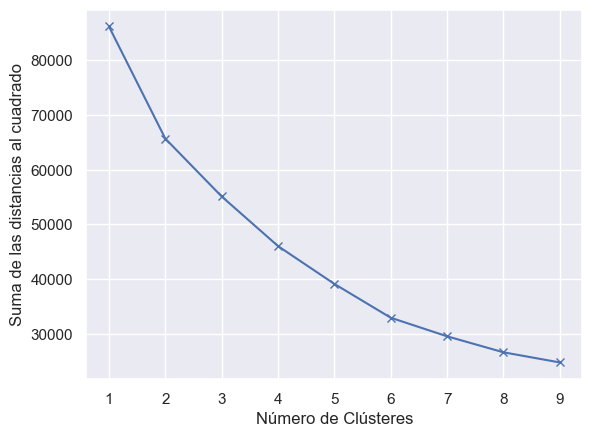

In [6]:
# Representación gráfica del método del codo
plt.plot(k_values, sum_of_squared_distances, 'bx-')
plt.xlabel('Número de Clústeres')
plt.ylabel('Suma de las distancias al cuadrado')
plt.show()

## 2) Aprendizaje Supervisado (4 puntos)

Se pide crear un modelo Linear Regression, para ello se deberá entrenar con el 80% del conjunto de datos (training set). Posteriormente se comprobará la precisión del modelo entrenado con el 20% restante (testing set).

### 2.1) Crear MRLM

In [7]:
# Dividir el conjunto de datos en entrenamiento y prueba
X = df2.drop("price", axis=1)
y = df2["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 2.2) Comprobar precisión

In [8]:
# Calcular el error absoluto medio (MAE) en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)

print("Error absoluto medio (MAE):", round(mae,2))
print("Error cuadrático medio (MSE):", round(mse,2))

Error absoluto medio (MAE): 76331.39
Error cuadrático medio (MSE): 15594136463.47


    Según el MAE, las predicciones pueden estar por encima o por debajo del valor real en alrededor de 74,327.51 euros.

## 3) Evaluación de Modelos (2 puntos)

Una vez creado el modelo Linear Regression, vamos a evaluar gráficamente la precisión del modelo. Para ello se pide representar con alguna librería de Python de las vistas en el primer Módulo tanto el resultado conocido del testing set vs el resultado que predice el modelo para ese mismo conjunto de datos.

### 3.1) Representar gráficamente la predicción

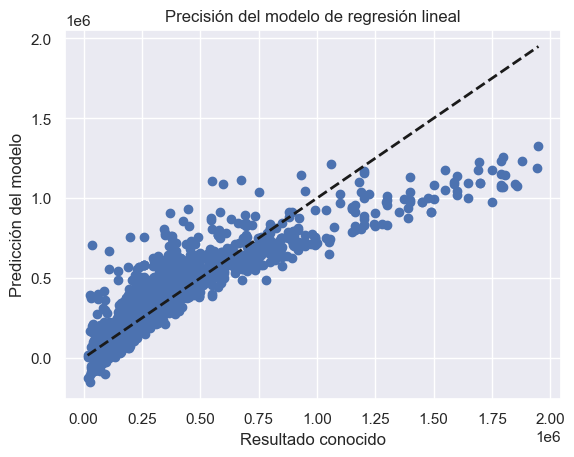

In [9]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Representación gráfica de los resultados conocidos vs. predicciones
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Resultado conocido')
plt.ylabel('Predicción del modelo')
plt.title('Precisión del modelo de regresión lineal')
plt.show()

### 3.2) Evaluar el gráfico anterior

La predicción es más fiable en precios bajos que en precios altos.